In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

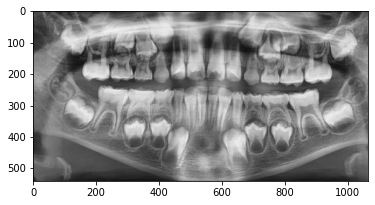

In [2]:
source = os.getcwd()
img = cv2.imread(source+"\\DentalImages3\\Test\\crop_Page-2-Image-1.jpg")
plt.imshow(img)

In [3]:

df = tf.keras.utils.image_dataset_from_directory(source+'\DentalImages3')
df=df.map(lambda x, y: (x/255,y))
df_iterator = df.as_numpy_iterator()
df_batch = df_iterator.next()

Found 147 files belonging to 3 classes.


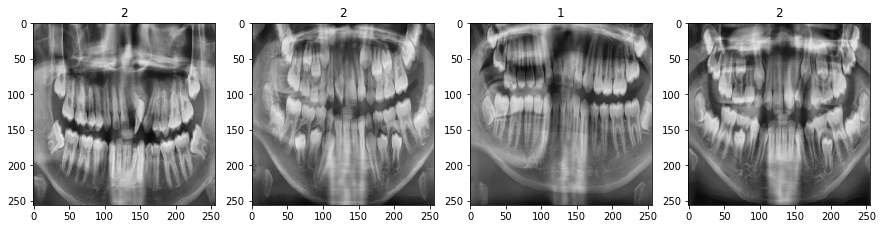

In [4]:
fig,ax = plt.subplots(ncols=4 , figsize = (15,15))
for idx,img in enumerate(df_batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(df_batch[1][idx])

In [5]:
train_size = int(len(df)*0.7)
val_size = int(len(df)*0.2)+1
test_size = int(len(df)*0.1)+1

train = df.take(train_size)
val = df.skip(train_size).take(val_size)
test = df.skip(train_size+val_size).take(test_size)

In [6]:
model = Sequential([Conv2D(16,(3,3),1,activation="relu",input_shape=(256,256,3)),
                                    MaxPooling2D(),
                                    #
                                    Conv2D(32,(3,3),1,activation="relu"),
                                    MaxPooling2D(),
                                    #
                                    Conv2D(16,(3,3),1,activation="relu"),
                                    MaxPooling2D(),
                                    ##
                                    Conv2D(16,(3,3),1,activation="relu"),
                                    MaxPooling2D(),
                                    ##
                                    Flatten(),
                                    ##
                                    Dense(256,activation="relu"),
                                    ##
                                    Dense(1,activation="sigmoid")
                                ])

In [7]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer="adam",metrics=["accuracy"])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [9]:
model.fit(train,epochs=5,validation_data=train)

Epoch 1/5
3/3 [==============================] - 11s 2s/step - loss: 0.1107 - accuracy: 0.2500 - val_loss: -1.1200 - val_accuracy: 0.4271
Epoch 2/5
3/3 [==============================] - 7s 2s/step - loss: -4.0549 - accuracy: 0.3542 - val_loss: -7.9448 - val_accuracy: 0.3854
Epoch 3/5
3/3 [==============================] - 5s 2s/step - loss: -12.5070 - accuracy: 0.4167 - val_loss: -19.6851 - val_accuracy: 0.3958
Epoch 4/5
3/3 [==============================] - 4s 2s/step - loss: -21.7883 - accuracy: 0.3958 - val_loss: -44.0200 - val_accuracy: 0.3646
Epoch 5/5
3/3 [==============================] - 5s 2s/step - loss: -58.2604 - accuracy: 0.4167 - val_loss: -91.6650 - val_accuracy: 0.3750


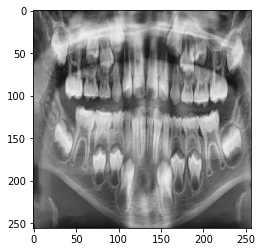

In [10]:
img = cv2.imread(source+"\\DentalImages3\\Test\\crop_Page-2-Image-1.jpg")

resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

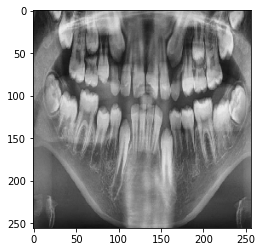

 ADOLESCENT


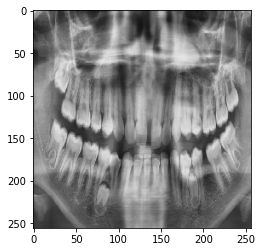

 ADOLESCENT


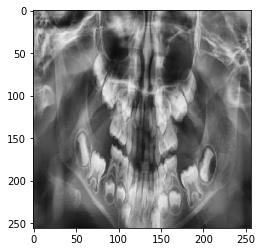

 ADOLESCENT


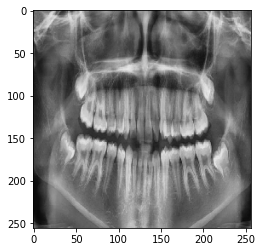

 ADOLESCENT


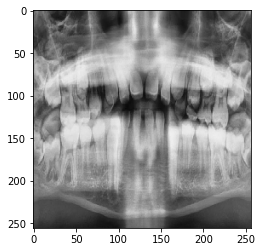

 ADULT


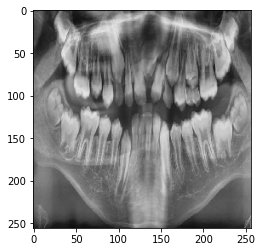

 ADOLESCENT


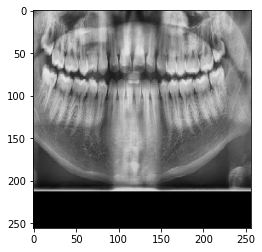

 ADOLESCENT


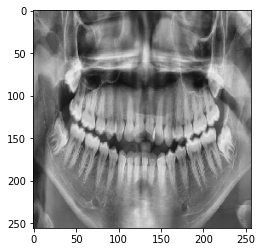

 ADOLESCENT


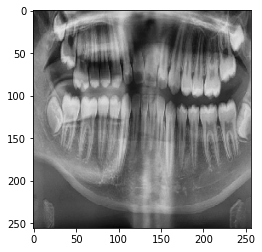

 ADOLESCENT


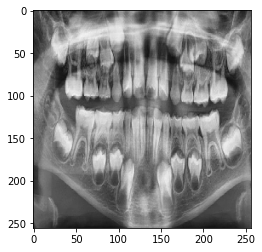

 ADOLESCENT


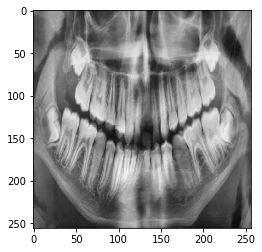

 ADOLESCENT


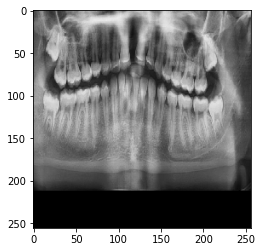

 ADOLESCENT


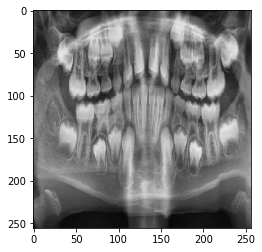

 ADOLESCENT


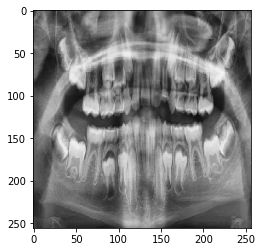

 ADOLESCENT


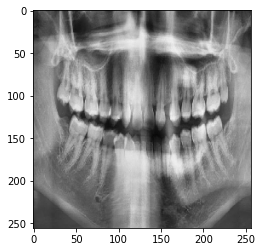

 ADULT


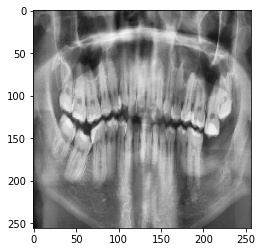

 ADULT


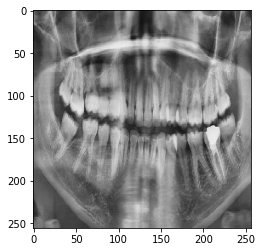

 ADOLESCENT


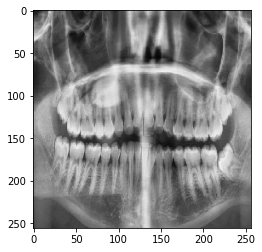

 ADOLESCENT


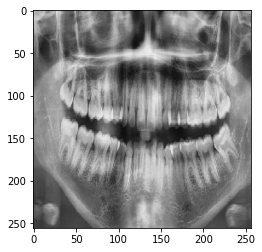

 ADOLESCENT


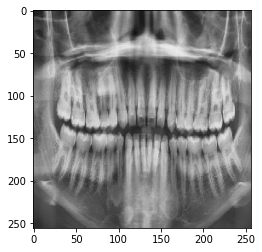

 ADOLESCENT


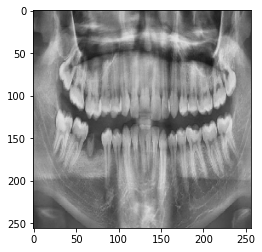

 ADULT


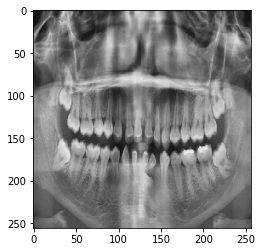

 ADOLESCENT


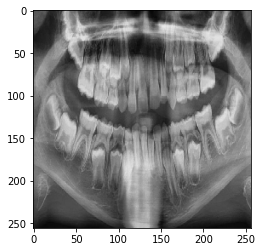

 ADOLESCENT


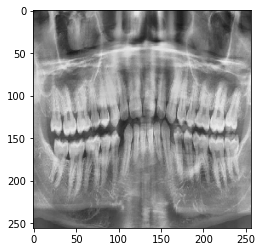

 ADULT


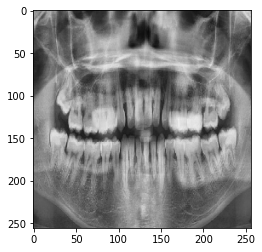

 ADOLESCENT


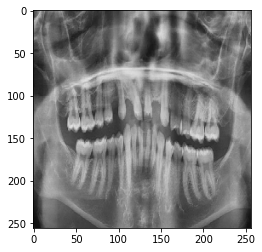

 ADOLESCENT


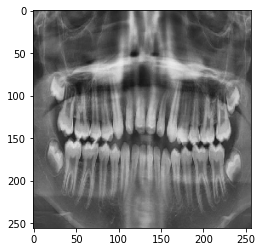

 ADOLESCENT


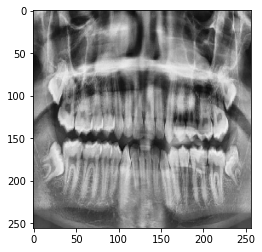

 ADOLESCENT


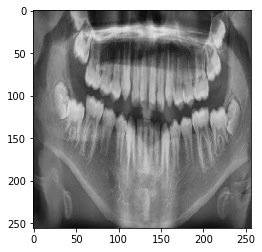

 ADOLESCENT


In [11]:


for i in os.listdir(source+"\\DentalImages3\\Test"):
    img=image.load_img(source+"\\DentalImages3\\Test\\"+i,target_size=(256,256))
    plt.imshow(img)
    plt.show()
    X=image.img_to_array(img)
    X=np.expand_dims(X/256,axis=0)
    X=X.mean()
    
#     X=image.img_to_array(img)
    
#     images=np.vstack([X])
    
#     abb = model.predict(images)
#     print(abb)
#     val = np.random.choice(range(0, 3),p=[0.30,0.25,0.45])
    if X>0.6:
        print(" CHILD")
    elif X>0.5:
        print(" ADULT")
    else:
        print(" ADOLESCENT")